# LayoutParser

A Python library for Document Image Analysis (DIA)

## **References:**

Official Notebook
[Examples from Layout parser in Github](https://github.com/Layout-Parser/layout-parser/blob/master/examples/OCR%20Tables%20and%20Parse%20the%20Output.ipynb)

Github repo: [Layout-Parser/layout-parser](https://github.com/Layout-Parser/layout-parser)

Research paper: [LayoutParser: A Unified Toolkit for Deep Learning Based Document Image Analysis](https://arxiv.org/abs/2103.15348)


Dataset: [A Large Dataset of Historical Japanese Documents with Complex Layouts](https://arxiv.org/abs/2004.08686)



## Install Dependencies
install LayoutParser library from PyPi package and Tesseract OCR Engine. Install other dependencies.

In [2]:
%%bash
pip install -U layoutparser -q
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' -q
pip install layoutparser[ocr] -q

sudo apt install tesseract-ocr -q
sudo apt install libtesseract-dev -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 9.0 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW pac

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigtable 2.24.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialo

In [3]:
!pip install google-api-core[grpc]==2.0.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.4/92.4 kB 1.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.4 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.10.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,!=2.9.*,<3.0.0dev,>=1.34.1, but you have google-api-core 2.0.0 which is incompatible.
google-api-python-client 2.84.0 requires google-api-core!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.0,<3.0.0dev,>=1.31.5, but you have google-api-core 2.0.0 which is incompatible.
google-cloud-aiplatform 1.59.0 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<3.0.0dev,>=1.34.1, but you have google-api-core 2.0.0 which is incompatible.
google-cloud-bigquery 3.21.0 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.10.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,!=2.

#### Restart the Session
The preinstalled `google-api-core` in Colab needs to be downgraded because layout-parser only works with a downgraded version. Specifically, layout-parser supports `google-api-core` version **2.0.0**, which is the last compatible version.

Downgrading `google-api-core` affects other dependencies required by `google-api-core`. Therefore, we need to restart the session to ensure all dependencies are correctly adjusted.

In [ ]:
import os
os.kill(os.getpid(), 9)

### Import the libraries

In [1]:
import cv2
import layoutparser as lp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Clone the source files for example data

In [2]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1357, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1357 (delta 341), reused 272 (delta 264), pack-reused 957
Receiving objects: 100% (1357/1357), 62.86 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (739/739), done.
Updating files: 100% (120/120), done.


#### Change directory to read the example data

In [3]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  paper-image.jpg


### Read an image from the source files to infer on it

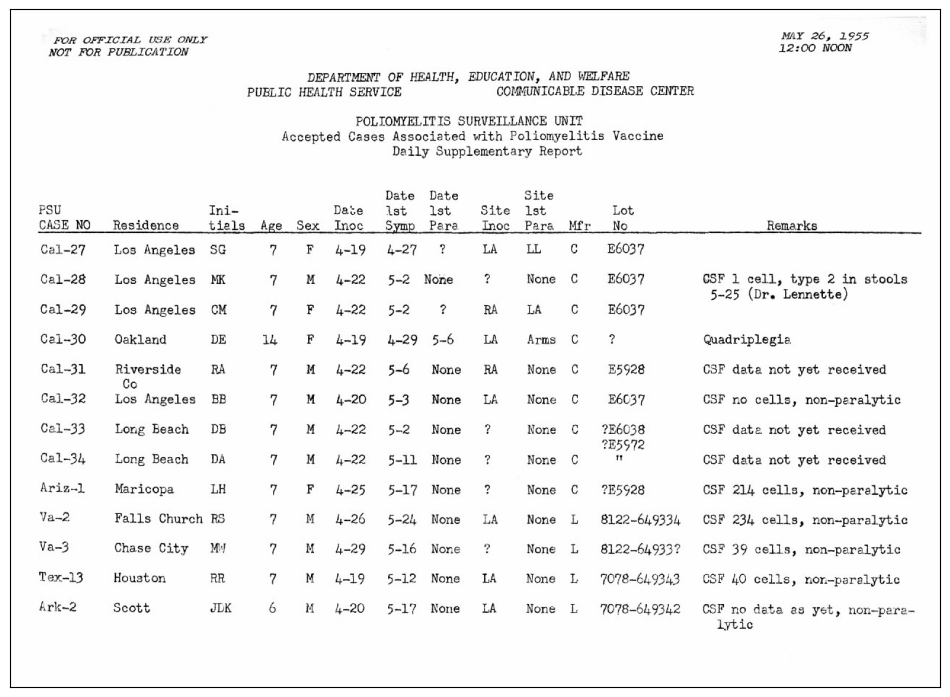

In [4]:
image = cv2.imread('example-table.jpeg')
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

## Load the TesseractAgent OCR Engine

In [5]:
model = lp.TesseractAgent()

### Detect the texts and their locations from the sample image.

In Tesseract OCR (Optical Character Recognition), the detection output can include detailed information about the recognized text at different hierarchical levels. Here is a breakdown of what each term represents:

1. **level**: This indicates the hierarchical level of the detected text. The levels are:
   - 1: Page level
   - 2: Block level
   - 3: Paragraph level
   - 4: Line level
   - 5: Word level
   - 6: Symbol level (only available in the latest versions and when enabled)

2. **page_num**: The number of the page where the detected text is located. This is useful in documents with multiple pages.

3. **block_num**: The number of the block within the page. A block is a contiguous area of text on the page, such as a column or a section of text.

4. **par_num**: The number of the paragraph within the block. This is the paragraph number relative to the current block.

5. **line_num**: The number of the line within the paragraph. This is the line number relative to the current paragraph.

6. **word_num**: The number of the word within the line. This is the word number relative to the current line.

7. **left**: The x-coordinate of the top-left corner of the bounding box around the detected text element. It represents the distance from the left edge of the image to the left edge of the bounding box.

8. **top**: The y-coordinate of the top-left corner of the bounding box around the detected text element. It represents the distance from the top edge of the image to the top edge of the bounding box.

9. **width**: The width of the bounding box around the detected text element. It represents how wide the detected text element is.

10. **height**: The height of the bounding box around the detected text element. It represents how tall the detected text element is.

11. **conf**: The confidence score for the recognized text. This is a value between 0 and 100 that indicates how confident the OCR engine is about the accuracy of the recognized text. Higher values indicate greater confidence.

12. **text**: The actual text that was recognized by the OCR engine.

This detailed hierarchical and positional information is extremely useful for various applications such as layout analysis, document digitization, and text extraction from complex layouts. By understanding these terms, you can better interpret and utilize the OCR results from Tesseract.

In [6]:
res = model.detect(image, return_response=True)

In [7]:
print("======================TEXT=============================")
print(res['text'])

======================TEXT=============================
FOR OFFICIAL

USE ONLY

MAY 26, 1955

 

NOT FOR PUBLICATION 12:00. 8008,
DEPARTMENT OF HEALTH, EDUCATION, AND WELFARE
PUBLIC HEALTH SERVICE COMMUNICABLE DISEASE CENTER
POLIOMYELITIS SURVEILLANCE UNIT
Accepted Cases Associated with Poliomyelitis Vaccine
Daily Supplementary Report
Date Date Site
PSU Ini- Date 1st lst Site 1st Lot
CASE NO Residence tials Age Sex Inoc Symp Para Inoc Para Mfr No Renarks
Cal-27 Los Angeles SG 7 F 419 4-27 2 TA LL oC E6O37
Cal-28 Los Angeles MK 7 M 4-22 5-2 None ? None C 86037 GSF 1 cell, type 2 in stools
5-25 (Dr. Lennette)
Cal-29 Los Angeles OM 7 F 22 5-2 ? RA LA CC B6037
Cal-~30 Oakland DE 14 Fo 4-19 4-29 5-6 LA Arms © 2 Quadriplegia
Cal-31 Riverside = RA 7 M 4-22 5-6 None RA None C 55928 CSF data not yet received
Co

Cal-32 Los Angeles BB 7  M 4-20 5-3 None LA None C 6037 CSF no cells, non-peralytic
Gel-33 Long Beach DB 7 M 4-22 5-2 None ? None C 56038 CSF date not yet received

E5972
Cal-34 Long Be

In [8]:
print("Shape of DataFrame: ", res['data'].shape)
res['data'].head()

Shape of DataFrame:  (327, 12)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1279,932,-1,
1,2,1,1,0,0,0,60,38,120,10,-1,
2,3,1,1,1,0,0,60,38,120,10,-1,
3,4,1,1,1,1,0,60,38,120,10,-1,
4,5,1,1,1,1,1,60,39,32,9,94,FOR


In [9]:
filtered_ocr_data = res['data'][res['data']['conf'] != -1]
print(f"Total Detection with Actual data detected by model: {len(filtered_ocr_data)}")
filtered_ocr_data.head()

Total Detection with Actual data detected by model: 282


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,60,39,32,9,94,FOR
5,5,1,1,1,1,2,101,38,79,10,96,OFFICIAL
9,5,1,2,1,1,1,192,38,30,9,94,USE
10,5,1,2,1,1,2,231,38,41,9,94,ONLY
14,5,1,3,1,1,1,1061,32,31,10,95,MAY


In [10]:
low_confidence_ocr_data = filtered_ocr_data[filtered_ocr_data['conf'] < 50]
print(f"Total Detection with confidence less than 50: {len(low_confidence_ocr_data)}")
low_confidence_ocr_data.head()

Total Detection with confidence less than 50: 40


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
27,5,1,5,1,1,4,1058,48,50,11,44,12:00.
28,5,1,5,1,1,5,1118,48,40,11,47,"8008,"
50,5,1,5,1,5,3,526,168,100,13,0,Associated
73,5,1,5,1,9,2,91,290,19,13,48,NO
74,5,1,5,1,9,3,142,290,90,14,49,Residence


#### Plot of OCR prediction Confidence

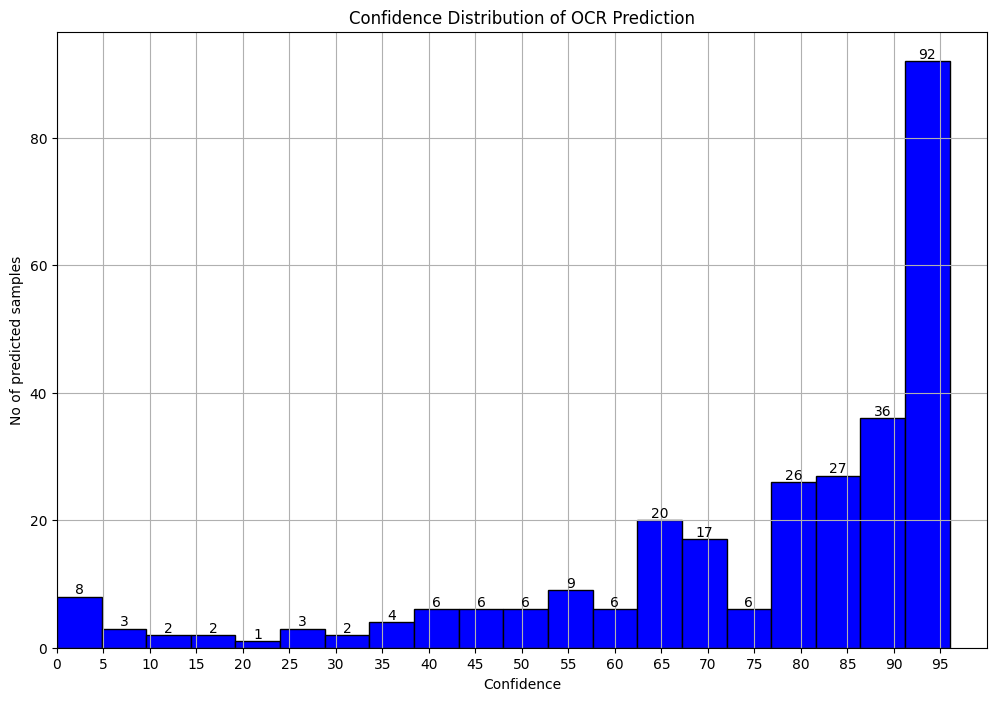

In [11]:
plt.figure(figsize=(12,8))
# Plot histogram
n, bins, patches = plt.hist(filtered_ocr_data['conf'], bins=20, color='blue', edgecolor='black')

# Add text annotations for frequencies
for i in range(len(n)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i], int(n[i]), ha='center', va='bottom')

plt.ylabel("No of predicted samples")
plt.xlim(0,100)
plt.xticks(range(0, 100, 5))
plt.title('Confidence Distribution of OCR Prediction')
plt.xlabel('Confidence')
plt.grid()
plt.show()

### Collect texts and their bounding boxes details as a processible data structure.

The `TesseractFeatureType` enum defines the different hierarchical levels within a recognized text using Tesseract OCR. Here are the valid arguments (types) for this enum:

0. `TesseractFeatureType.PAGE`: This represents the entire page being processed by Tesseract. It's the highest level in the hierarchy.
1. `TesseractFeatureType.BLOCK`: This represents a block of text within the page. Blocks are typically separated by whitespace or layout elements.
2. `TesseractFeatureType.PARA`: This represents a paragraph within a block. Paragraphs are usually separated by line breaks.
3. `TesseractFeatureType.LINE`: This represents a single line of text within a paragraph.
4. `TesseractFeatureType.WORD`: This represents an individual word extracted from the line.

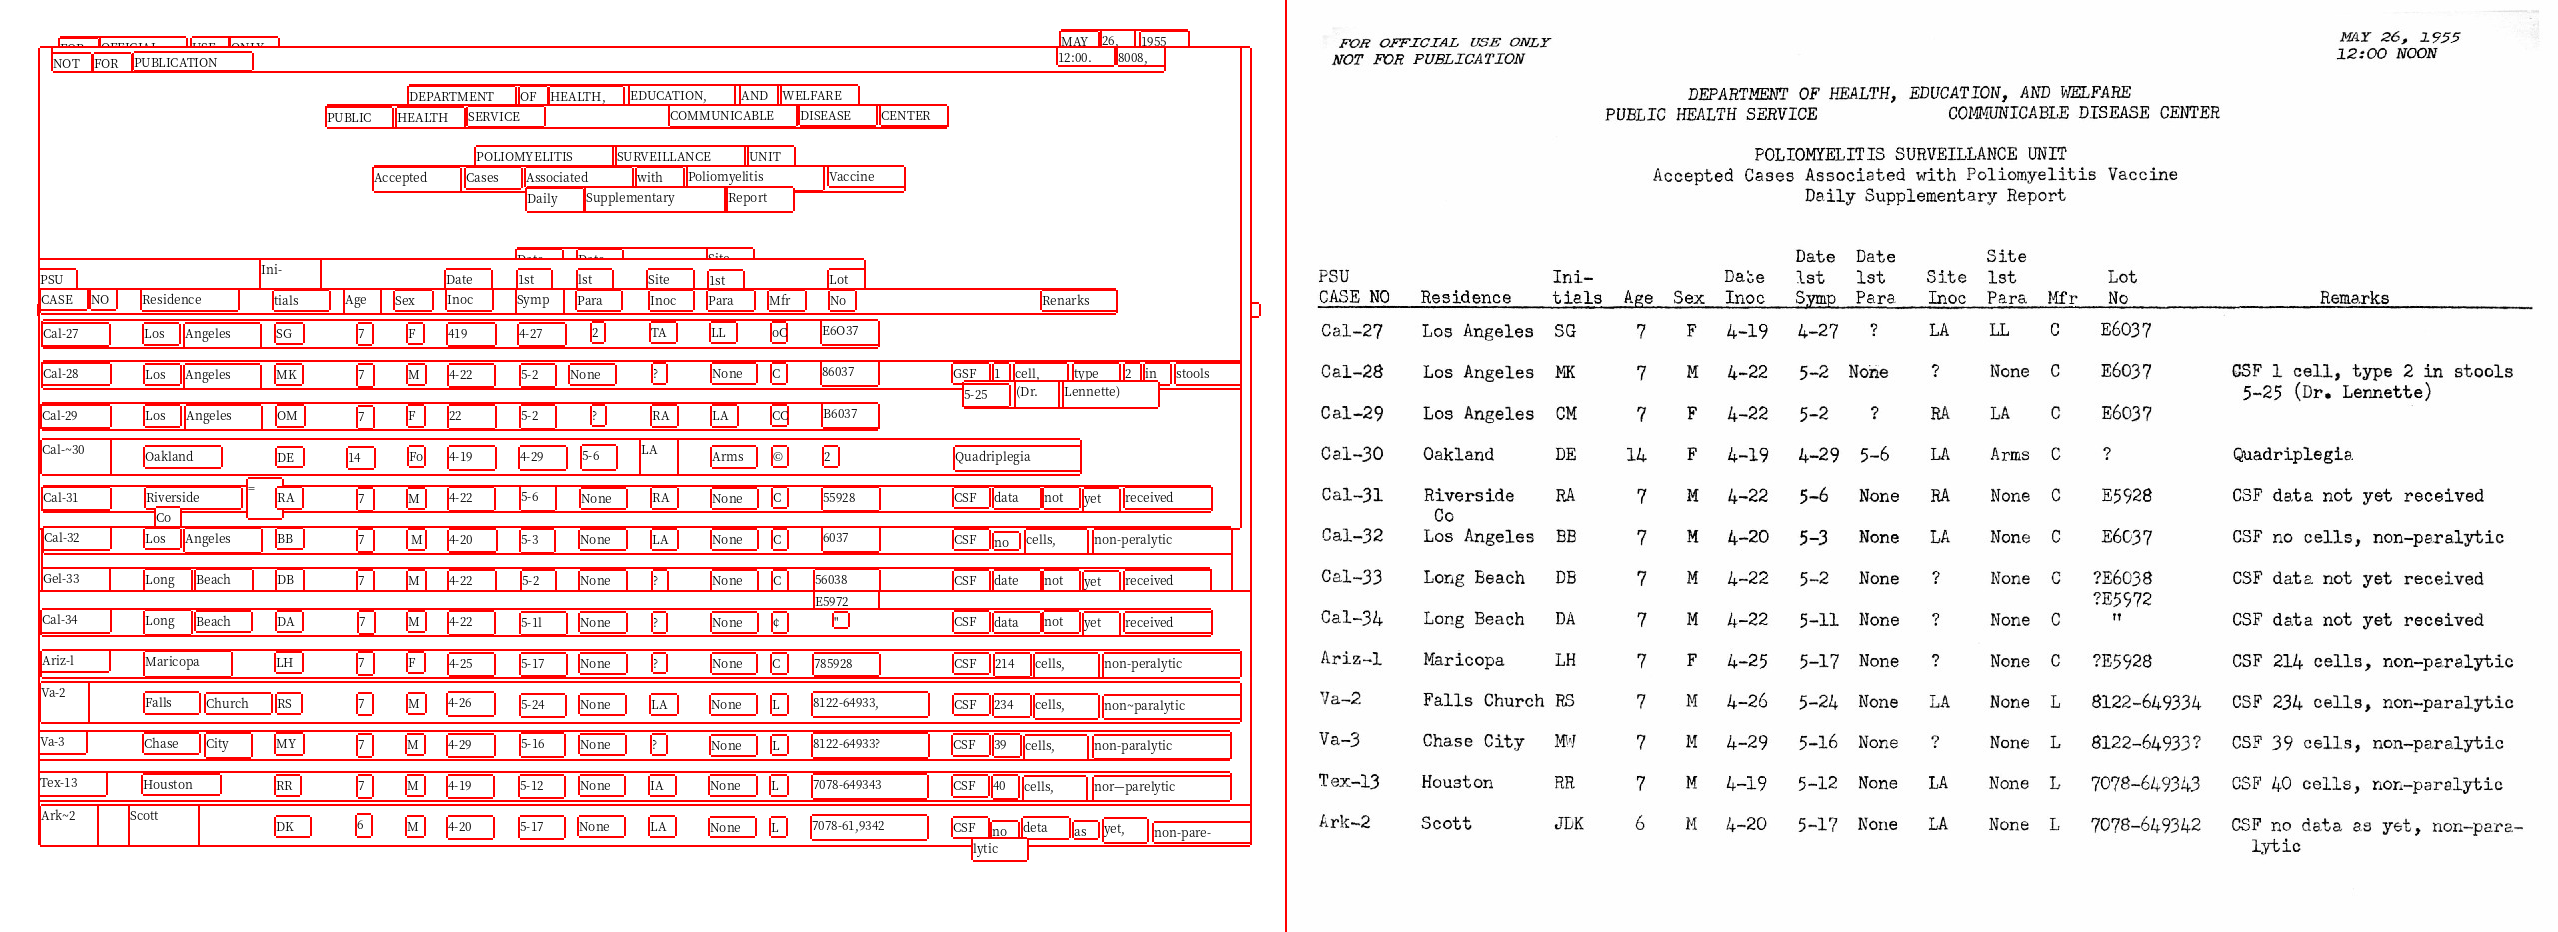

In [12]:
ocr  = model.gather_data(res, lp.TesseractFeatureType(4))
ocr
# Display the image with texts along with their bounding boxes
lp.draw_text(image, ocr, font_size=12, with_box_on_text=True,
             text_box_width=5)

In [13]:
# save the prediction  in json format
import json
with open('/content/ocr_json.json', 'w') as outfile:
    json.dump(ocr.to_dict(), outfile)


In [14]:
predicted_data = ocr.to_dict()

In [15]:
cpy_image = image.copy()
for record in predicted_data["blocks"]:
  if record["score"]==-1:
    continue
  image = cv2.rectangle(image, (record["x_1"], record["y_1"]), (record["x_2"], record["y_2"]), (255, 0, 0) , 1)

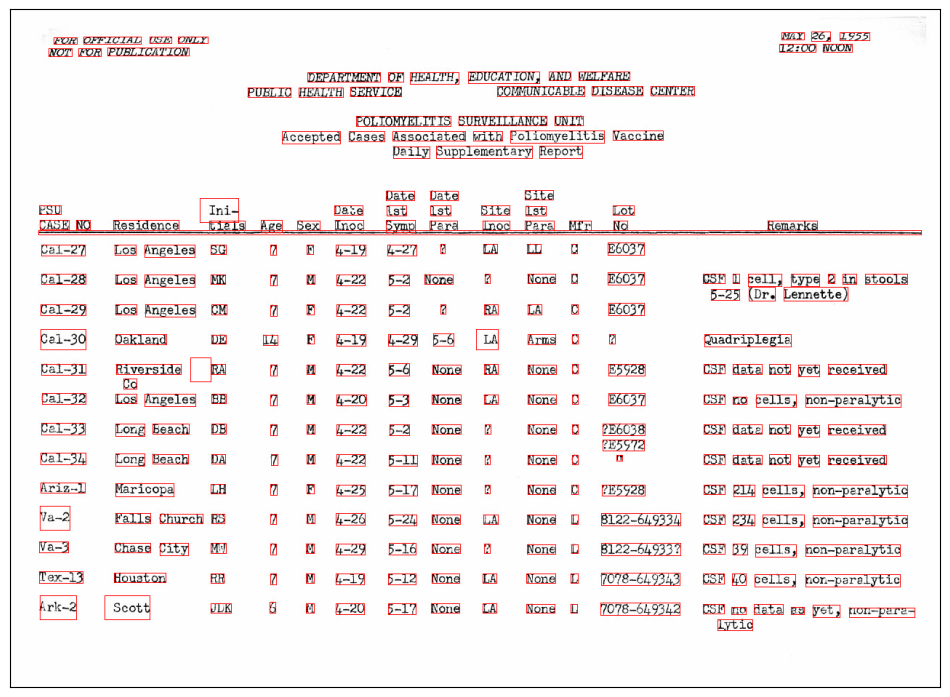

In [16]:
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
blank_paper = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

# font
font = cv2.FONT_HERSHEY_SIMPLEX

# fontScale
fontScale = 0.5

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 2 px
thickness = 1


for record in predicted_data["blocks"]:
  org = (record["x_1"], record["y_1"])
  if record["score"]==-1:
    continue
  # changes is refelcted on processed image
  cv2.putText(blank_paper, record["text"], (org), font,
                   fontScale, color, thickness, cv2.LINE_AA)

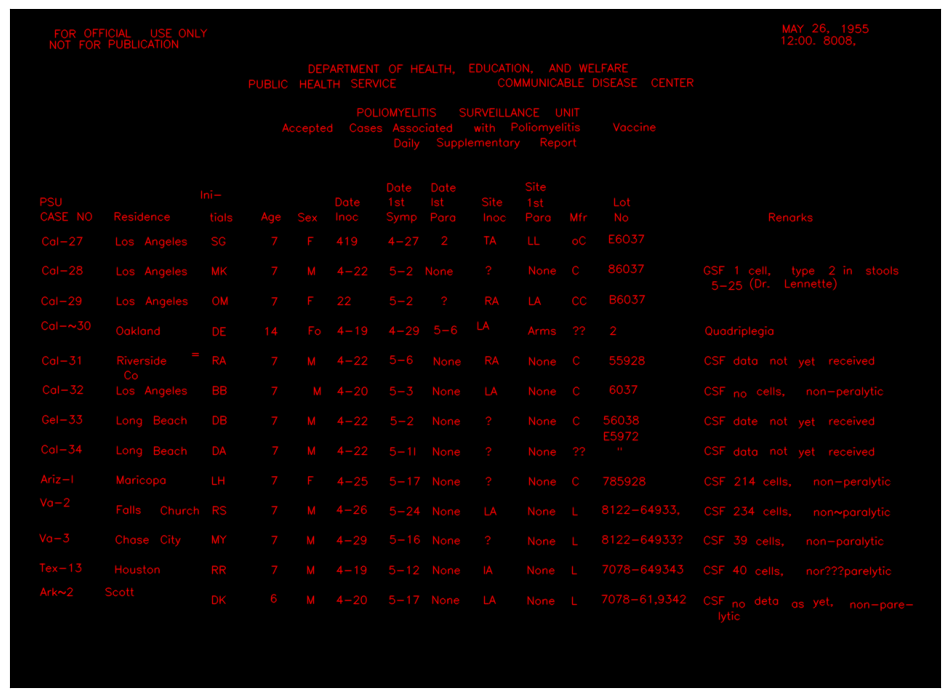

In [18]:
# display image
plt.figure(figsize=(12,16))
plt.imshow(blank_paper)
plt.xticks([])
plt.yticks([])
plt.show()

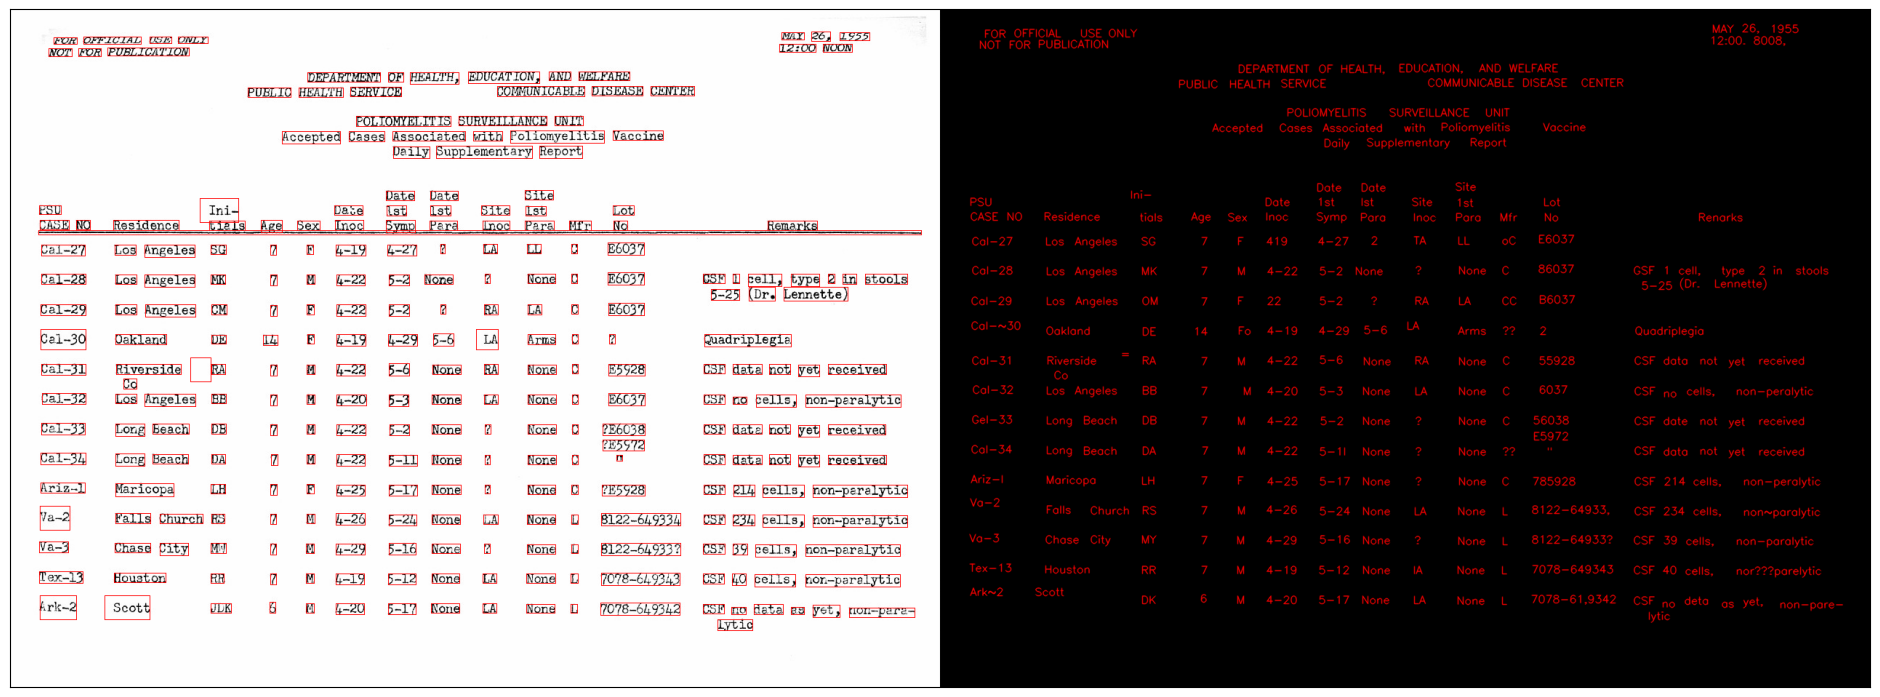

In [19]:
# combine two original and predicted text image
combined_image = np.hstack((image, blank_paper))
plt.figure(figsize=(24,32))
plt.imshow(combined_image)
plt.xticks([])
plt.yticks([])
plt.show()